<h1>Visual Search Engines: Final Project</h1>
<p>
After several weeks of hard labor on implementing image thresholding, convolutions, bag-of-words histograms, nearest neighbour classifiers, and average precision scores, we have arrived at the final project.
<br>
In this final project, we will combine all the lessons we've learned into a real-world application!
<br>
<br>
<strong>Note: Also download the Animal Dataset from Piazza to make everything work.</strong>
<br>
<br>
<strong>The goal of the project:</strong> Automatically classify images of animals.
<br>
In this project, you are given 1000 train images and 200 validation images from 10 animal categories. Using these images, the goal is to correctly classify 500 test images.
<br>
The 10 animal categories: "blue whale", "chihuahua", "chimpanzee", "fox", "gorilla", "killer whale", "seal", "tiger", "wolf", zebra".
<br>
An example image of each animal:
<br>
</p>
<img src="dataset/trainset/blue+whale/blue+whale_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/chihuahua/chihuahua_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/chimpanzee/chimpanzee_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/fox/fox_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/gorilla/gorilla_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/killer+whale/killer+whale_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/seal/seal_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/tiger/tiger_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/wolf/wolf_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/zebra/zebra_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>

As you can see from the above examples, this classification problem is quite tricky, as the images are of different size and do not always cleanly show each animal. Look for example at the blue whale and the seal examples. For the blue whale image, only the tail is visible, while for the seal image, you get to see multiple seals.
<br>
<br>
<strong>So, how are we going to tackle this problem?</strong>
<br>
We will use the pipeline we have created to make a representation of each image that can be used for classification! During the last weeks, we have built a image classification pipeline step-by-step, containing the following elements:
<ol>
<li> Extract local features from images.</li>
<li> Cluster local features using k-means to get a codebook.</li>
<li> For an image, compute the bag-of-words histogram using the clustered codebook.</li>
<li> Given a bag-of-words histogram representation, classify test images using your favorite classifier.</li>
</ol>
<br>
<br>
In this final project, we will move the lessons we've learned into a real-world challenge. We will extract SIFT features from the animal images, create (big) bag-of-words histograms, and classify 500 images!
<br>
<br>
To make it even more interesting, we will make this project into a challenge by making a public leaderboard. That way, you can find out who has the best classification scores and you can compare numbers.

<h3>Phase 0: Creating an account for the leaderboard</h3>
For the public leaderboard, we will use "Kaggle in Class", which is a very helpful site for performing such challenges. In order to compete, go to the Kaggle website (at kaggle.com) and create an account (1 per group). We will hand out a link so you can be part of the competition.
<br>
<br>
For using the leaderboard, all you have to do is upload a file containing your predictions for each of the 500 test images. That file will be generated at the end of the notebook.

<h3>Phase 1: Extracting SIFT features from images</h3>
In order to perform the classification, we need solid local features. Here, we use SIFT features, for which the Python code has 
been provided by former course lecturer dr. Jan van Gemert (currently Assistent Professor at Delft University of Technology).<br>
The code for SIFT in Python is in the folder pySift. The code provides 3 ways of extracting locations from images, namely dense sampling (extract a location from a grid), hessian interest points and harris interest points. Below, you can see the code for finding the locations:

In [6]:
# NOTE: PLEASE MAKE SURE THE 'DATASET'-FOLDER, THE 'PYSIFT'-FOLDER, 'TESTSET-OVERVIEW-FINAL.TXT', 'TRAINSET-OVERVIEW.TXT' 
# AND 'VALSET-OVERVIEW.TXT' ARE IN THE FOLDER YOU RUN THIS CODE FROM. 

# All necessary library imports
import sys
sys.path.append("pySift")
from pySift import sift, matching

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.cluster import k_means
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Global parameters to easily tweak the algorithm

sigma = 1.0
nr_clusters = 10
nr_iterations_kmeans = 100
nr_knn_neighbors = 30
densepoints_stride = 25

# Load the file containing the training images.
trainimages = [line.strip().split(" ")[0] for line in open("trainset-overview.txt", "r")]

(300L, 416L, 3L)


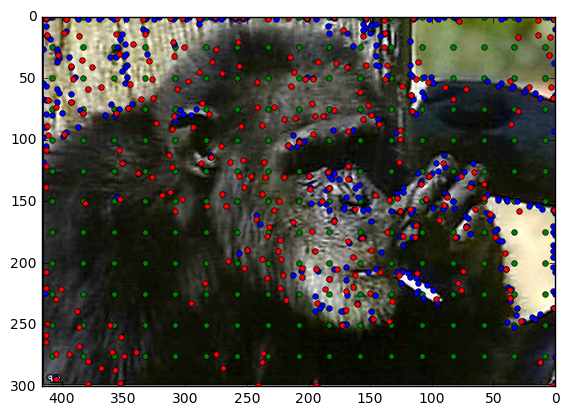

In [5]:
# THIS CODEBLOCK CAN BE SKIPPED, IT ONLY CONTAINS EXAMPLES

# Use an example image.
imagename = "dataset/trainset/chimpanzee/chimpanzee_0097.jpg"

# Example for dense sampling.
densepoints = sift.densePoints(imagename, stride=25)

# Example for hessian interest points.
hespoints   = sift.computeHes(imagename, sigma, magThreshold=15, hesThreshold=10, NMSneighborhood=10)

# Example for harris interest points.
harpoints   = sift.computeHar(imagename, sigma, magThreshold=5, NMSneighborhood=10)

# Plot the points!
image = mpimg.imread(imagename)
print image.shape

plt.imshow(image)
plt.plot(densepoints[:,0], densepoints[:,1], 'go', ms=4)
plt.plot(hespoints[:,0], hespoints[:,1], 'bo', ms=4)
plt.plot(harpoints[:,0], harpoints[:,1], 'ro', ms=4)
plt.tight_layout()
plt.xlim([image.shape[1],0])
plt.ylim([image.shape[0],0])
plt.show()

As you can see from the example above, each method finds other points to focus on. For this final project, you are free to choose the method AND you are free to select the parameters. In fact, it will be wise to change parameters for the best performance. Naturally, we want you to explain your choices and your parameters in the report.
<br>
<br>
Alternatively, it is also possible to combine the point detectors. The code below shows how to combine them. It also shows how to get the actual SIFT features:

In [7]:
# THIS CODEBLOCK CAN BE SKIPPED, IT ONLY CONTAINS EXAMPLES

# Combine the point detectors.
# Print the number of points per method.
print densepoints.shape, hespoints.shape, harpoints.shape
# Combine the points.
allpoints = np.concatenate((densepoints, hespoints, harpoints))
print allpoints.shape
print type(allpoints)
# Compute the SIFT features from different point sets.
point1, sift1 = sift.computeSIFTofPoints(imagename, densepoints, sigma, nrOrientBins=8, nrSpatBins=4, nrPixPerBin=4)
point2, sift2 = sift.computeSIFTofPoints(imagename, allpoints, sigma, nrOrientBins=8, nrSpatBins=4, nrPixPerBin=4)
?
print
print point1.shape, sift1.shape
print point2.shape, sift2.shape

(204L, 2L) (338L, 2L) (275L, 2L)
(817L, 2L)
<type 'numpy.ndarray'>

(165L, 2L) (165L, 128L)
(596L, 2L) (596L, 128L)


As you can see from the above piece of code, it is quite easy to get SIFT features. Simply get some points and call the SIFT function.
<br>
<strong>Note that the SIFT function throws away some point that can not be used for SIFT (e.g. on the edge of the image).</strong>

<h3>Helpful Side Comment: Saving and Loading</h3>
<p>
Some of your experiments in the following sections may take a long time to compute. It can be helpful, therefore, to save variables to disk so that you can load them later instead of re-calculating them. Below is a simple example to write an array to a file and then load it from that file. It would be wise to consider doing this for anything that takes a long time to calculate, and which you're likely to re-use.

In [8]:
# THIS CODEBLOCK CAN BE SKIPPED, IT ONLY CONTAINS EXAMPLES

#Simple test array:
test_array = np.random.rand(6,6)
print "Test array:\n",test_array
#Save array in a file:
np.save('test_filename.npy',test_array)

#Now we try loading the file:
loaded_array = np.load('test_filename.npy')
print "\nLoaded array:\n",loaded_array
#And check that it's the same as the one we saved
print '\nThe arrays are equal:', np.all(loaded_array == test_array)

Test array:
[[ 0.36749242  0.21741815  0.61026846  0.26229948  0.10461963  0.72366111]
 [ 0.11897809  0.16878055  0.23266348  0.6534972   0.68423963  0.68926788]
 [ 0.60675483  0.63582593  0.06699149  0.4737891   0.85324196  0.51141192]
 [ 0.95805108  0.18808918  0.15877776  0.26782699  0.42134256  0.76311153]
 [ 0.45231723  0.9579307   0.09430568  0.08016739  0.38312346  0.13247836]
 [ 0.44829611  0.50601499  0.83562261  0.42327437  0.85855716  0.27070605]]

Loaded array:
[[ 0.36749242  0.21741815  0.61026846  0.26229948  0.10461963  0.72366111]
 [ 0.11897809  0.16878055  0.23266348  0.6534972   0.68423963  0.68926788]
 [ 0.60675483  0.63582593  0.06699149  0.4737891   0.85324196  0.51141192]
 [ 0.95805108  0.18808918  0.15877776  0.26782699  0.42134256  0.76311153]
 [ 0.45231723  0.9579307   0.09430568  0.08016739  0.38312346  0.13247836]
 [ 0.44829611  0.50601499  0.83562261  0.42327437  0.85855716  0.27070605]]

The arrays are equal: True


<h3>Phase 2: Clustering SIFT features from training images</h3>
Now that we know how to get SIFT features from images, we can start implementing the model.
<br>
<strong>First step:</strong> Get some SIFT features from train images and compute clusters.
<br>
These clusters will be used to yield a bag-of-words representation!
<br>
<br>
The code below read the file containing the training images and goes through all the image names. It is your job here to fill out this function to get the clusters.
<br>
<br>
<b>Note</b>: This step may take a while, depending on what settingsy ou use.
<br>
<i>Hint:</i> It may be a good idea to first get it working on a small selection of the training images.

In [4]:
# NOTE: THIS BLOCK SHOULD ONLY RUN IN CASE WE NEED TO GENERATE SIFT FEATURES FOR THE TRAINING DATA
# IF NOT, RUN THE NEXT BLOCK

# Initialize list in which we will store the SIFT features for the interestpoints and store their locations
trainpoints = []
trainpoint_locs = []

# For each image in the training set, we find the interestpoints and calculate the SIFT features
for i in xrange (len(trainimages)):
    
    # Find all the three types of SIFT points
    hespoints = sift.computeHes(trainimages[i], sigma, magThreshold=15, hesThreshold=10, NMSneighborhood=10)
    harpoints = sift.computeHar(trainimages[i], sigma, magThreshold=5, NMSneighborhood=10)
    densepoints = sift.densePoints(trainimages[i], stride=densepoints_stride)
    
    # Put all the points togethers
    harhesdensepoints = np.concatenate((hespoints, harpoints, densepoints))
    
    # Calculate the SIFT features for all interestpoints
    points, features = sift.computeSIFTofPoints(trainimages[i], harhesdensepoints, sigma, nrOrientBins=8, nrSpatBins=4, nrPixPerBin=4)
    trainpoint_locs.append(points)
    trainpoints.extend(features)

# Save the points to files
np.save('trainpoints.npy',trainpoints)
np.save('trainpointlocs.npy',trainpoint_locs)

In [3]:
# load the trainpoints
loaded_array = np.load('trainpoints.npy')

In [ ]:
#NOTE: THIS BLOCK SHOULD ONLY RUN IN CASE WE NEED TO FIND NEW CLUSTER CENTROIDS
#IF NOT, RUN THE NEXT BLOCK

# Function to cluster data and return the centroids for these clusters
def find_centroids(features, nr_clusters, nr_iter=nr_iterations_kmeans):
    centroids = k_means(features, n_clusters=nr_clusters, max_iter=nr_iter)[0]
    return centroids

# Cluster the SIFT features and put them in a matrix with the name 'clusters'
centroids = find_centroids(loaded_array, nr_clusters)
# Save the clusters to file
np.save('centroids.npy',centroids)

In [4]:
# Load the centroids from file
centroids = np.load('centroids.npy')

<h3>Phase 3: Making bag-of-words histograms of all the images</h3>
At this point, you have a set of clusters. Now, it is time to make a bag-of-word representation for all the images in the dataset. You will do this in the code below:

In [9]:
#NOTE: THIS BLOCK SHOULD ONLY RUN IN CASE WE NEED TO RECREATE THE BAGS OF CLUSTERS
#IF NOT, RUN THE NEXT BLOCK

# Function that finds the nearest centroid for a given datapoint using KNN, 
# and returns for each datapoint to which centroid (represented by a number) it got assigned to
def cluster_assignment(features, centroids):
    indices = range(centroids.shape[0])
    neigh = KNeighborsClassifier(n_neighbors=1,p=2) 
    neigh.fit(centroids, indices)
    assignments = neigh.predict(features)
    return assignments

# Function that creates a Bag of Clusters: given a set of SIFT features, this function
# will provide a histogram indicating for each cluster centroids how many of those SIFT features are assigned to it.
def create_histogram(features, centroids):
    assignments = cluster_assignment(features, centroids)
    histogram = np.zeros(centroids.shape[0], dtype=np.float)
    for feature in assignments:
            histogram[feature] += 1
    return histogram

# Go through the SIFTs of every image and create a histogram for the image
# relative to the clusters you discovered in the previous phase.
def sift_generator(images):
    # The size of the histograms should be equal to the number of clusters
    size_of_histograms = len(centroids)
    # Initialize an empty array in which we can store the histogram for each image
    allhistograms = np.zeros((len(images), size_of_histograms))
    
    for i in xrange (len(images)):
        # Find all the three types of interest points
        hespoints = sift.computeHes(images[i], sigma, magThreshold=15, hesThreshold=10, NMSneighborhood=10)
        harpoints = sift.computeHar(images[i], sigma, magThreshold=5, NMSneighborhood=10)
        densepoints = sift.densePoints(images[i], stride=densepoints_stride)
    
        # Put all the interest points togethers
        harhesdensepoints = np.concatenate((hespoints, harpoints, densepoints))
        # Calculate the SIFT features for the interstpoints
        points, features = sift.computeSIFTofPoints(images[i], harpoints, sigma, nrOrientBins=8, nrSpatBins=4, nrPixPerBin=4)
        allhistograms[i] = create_histogram(features, centroids)
    
    return allhistograms

# Get the histogram representation for each training image
train_histogramrepresentations = sift_generator(trainimages)
   
# Save bog of clusters to file
np.save('train_histogramrepresentations.npy', train_histogramrepresentations)

In [10]:
# Load the histogram representations
train_histogramrepresentations = np.load('train_histogramrepresentations.npy')

<h3>Phase 4: Training a classifier</h3>
<p>
You now have your images in a representation to train on. Below, you should train a classifier on your representation. To begin with, use your k-NN implementation. N.b., since k-NN does a simple comparison between your training set and your evaluation set, there is no model to "train" with k-NN. We load the ground truth for the training images below.
<p>
<h4>Validation Set</h4><p>
As you will be evaluating your parameter choices, you need a separate dataset to compare on. For this reason, a "validation" set has been provided. The idea behind a validation set is that it allows you to evaluate your model and parameters before applying them to the test set. As the test set is meant to represent unseen data, you should not use the test set to inform your parameter and methodology decisions. Below we load the validation set image files into a list for you, and you should transform these images into your representation (as you did above), and check your model's performance on them.

In [11]:
# Load validation images
valimages = [line.split(' ')[0] for line in open('valset-overview.txt','r')]

# Calculate the histogram representations for the validation images
val_histogramrepresentations = sift_generator(valimages)

In [13]:
# Load training ground truth labels
train_labels = np.array([int(line.strip().split(" ")[1]) for line in open("trainset-overview.txt", "r")])
# Load validation ground truth labels
val_labels = np.array([int(line.rstrip().split(' ')[1]) for line in open('valset-overview.txt','r')])
   
# Function to make classification predictions with a KNN classifier    
def nn_classifier(test_images, train_images, train_labels):
    neigh = KNeighborsClassifier(n_neighbors=nr_knn_neighbors, p=2) 
    neigh.fit(train_images, train_labels)
    predictions = neigh.predict(test_images)
    return predictions

# Predict the classes of the images in the validation set using your classifier
val_predictions = nn_classifier(val_histogramrepresentations, train_histogramrepresentations, train_labels)

In [14]:
# Show accuracy of the validation predictions
print accuracy_score(val_labels, val_predictions)

0.335


<h3>Phase 5: Predicting test images and uploading the results</h3>
<p>
Once you have a model that works well on the validation set, you can submit your predictions on the test set. We provide you with the image filename list as well as code to save your predictions as a csv so you can submit to Kaggle. 

In [16]:
# We load the filenames for the test set
# There is no ground truth provided for this set.
testimages = [line.strip().split(' ')[0] for line in open('testset-overview-final.txt','r')]

# Calculate the histogram representation for the test images.
test_histogramrepresentations = sift_generator(testimages)
    
# Initialize an array to store our predictions for the testimages
test_predictions = np.zeros(len(testimages))
# Generate the predictions in that array
test_predictions = nn_classifier(test_histogramrepresentations, train_histogramrepresentations, train_labels)

# Save the predictions to csv file so it can be uploaded to Kaggle
test_p_file = open('test_predictions.csv','w')
test_p_file.write('ImageName,Prediction\n')
for i,image in enumerate(testimages):
    test_p_file.write(image+','+str(int(test_predictions[i]))+'\n')
test_p_file.close()

Your predictions have been saved to a file called 'test_predictions.csv'. You can upload this through the Kaggle interface to make your submission.
<p><h3>Want to do better?</h3>
In order to get the best performance, you will  need to tune the parameters of SIFT, of the bag-of-words (number of clusters), and of your classifier.
<br>
<br>
If you think that you've exhausted these parameters but still want to perform better, you can look at a number of things:
<ul>
<li>What if I use other distance functions in my knn classifiers? Look e.g. at: the histogram intersection distance or Manhattan distance online.</li>
<li>Other classifiers: You are allowed to use other classifiers from sklearn (e.g. SVMs, Random Forests, AdaBoost, ...). You will need to figure out how these functions work and how to set the parameters (using the validation images). You should also be prepared to provide the motivation for any decisions in your report.</li>
<li>What about better bag-of-words representations (e.g. VLAD or Fisher Vector)?</li>
<li>What about deep networks?</li>
<li>Your own weird idea. If you have some idea in your head, try it out! We welcome those ideas. They do not even have to give a  performance boost, as long as you can explain the reasons behind your idea.</li>
</ul>